In [2]:
from qiskit import QuantumCircuit
import numpy as np

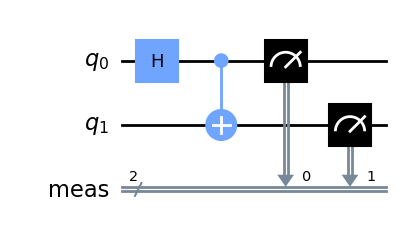

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl', plot_barriers=False, style='clifford')

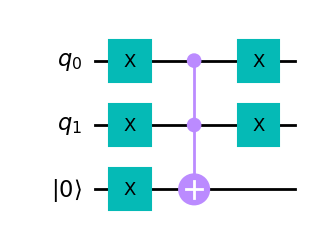

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q = QuantumRegister(2, name='q')
anc = QuantumRegister(1, name="|0\\rangle")
qc = QuantumCircuit(q, anc)
qc.x(q[0])
qc.x(q[1])
qc.x(anc[0])
qc.ccx(q[0],q[1], anc)
qc.x(q[0])
qc.x(q[1])
qc.draw(output='mpl', plot_barriers=False, style='clifford')

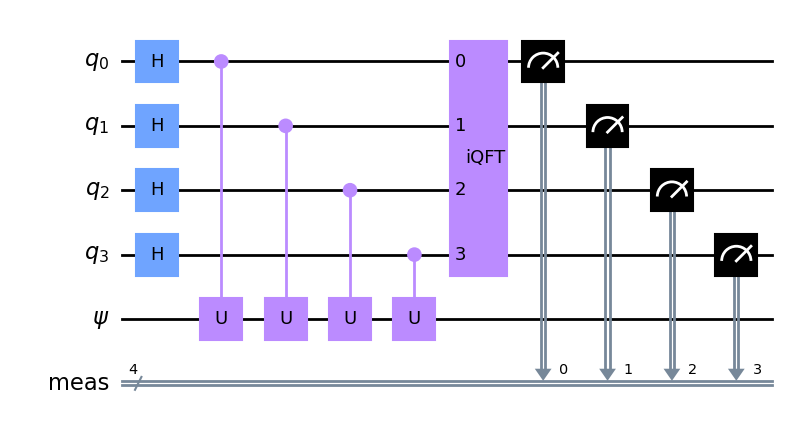

In [5]:
from qiskit.circuit.library import QFTGate
q = QuantumRegister(4, 'q')
qcl = ClassicalRegister(4, 'meas')
psi = QuantumRegister(1, '\\psi')
qc = QuantumCircuit(q, psi, qcl)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
sub_circuit = QuantumCircuit(1, name="U")
sub_circuit.x(0)
qc.append(sub_circuit.control(1), [q[0], psi[0]])
qc.append(sub_circuit.control(1), [q[1], psi[0]])
qc.append(sub_circuit.control(1), [q[2], psi[0]])
qc.append(sub_circuit.control(1), [q[3], psi[0]])
sub_circuit = QuantumCircuit(len(q), name="iQFT")
sub_circuit.append(QFTGate(4).inverse(), sub_circuit.qubits)
qc.append(sub_circuit, q)
qc.measure(q, qcl)
qc.decompose(gates_to_decompose=["c_U"]).draw(output='mpl', style='clifford')

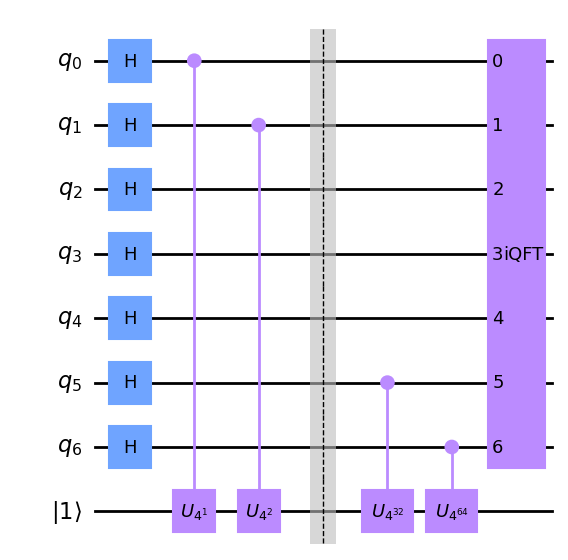

In [6]:
from qiskit.circuit.library import QFTGate
n = 3
N = 2*n + 1

q = QuantumRegister(N, 'q')
psi = QuantumRegister(1, '|1\\rangle')
qc = QuantumCircuit(q, psi)
# H entire register
qc.h(q)
    
qc.append(QuantumCircuit(1, name=f"$U_{{4^{{{2 ** 0}}}}}$").control(1), [q[0], psi[0]])
qc.append(QuantumCircuit(1, name=f"$U_{{4^{{{2 ** 1}}}}}$").control(1), [q[1], psi[0]])
qc.barrier()
qc.append(QuantumCircuit(1, name=f"$U_{{4^{{{2 ** 5}}}}}$").control(1), [q[-2], psi[0]])
qc.append(QuantumCircuit(1, name=f"$U_{{4^{{{2 ** 6}}}}}$").control(1), [q[-1], psi[0]])
sub_circuit = QuantumCircuit(len(q), name="iQFT")
sub_circuit.append(QFTGate(N).inverse(), sub_circuit.qubits)
qc.append(sub_circuit, q)
qc.decompose(gates_to_decompose=["c*"]).draw(output='mpl', style='clifford', fold=-1)

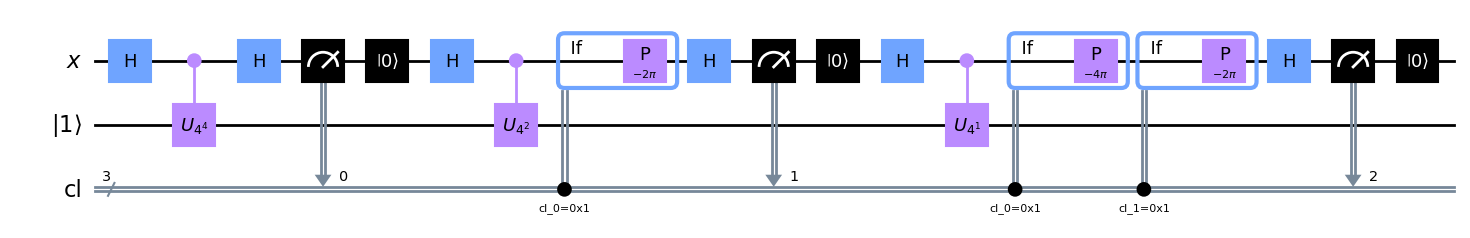

In [7]:
n = 3
N = 3

x = QuantumRegister(1, "x")
psi = QuantumRegister(1, "|1\\rangle")
classical_register_qft = ClassicalRegister(N, "cl")

circuit = QuantumCircuit(x, psi, classical_register_qft)
# circuit.x(psi[0])

for i in reversed(range(0, N)):  # range is reversed as the first step of IQFT is a swap of the order
    circuit.h(x[0])
    circuit.append(QuantumCircuit(1, name=f"$U_{{4^{{{2 ** i}}}}}$").control(1), [x[0], psi[0]])
    
    for j in range(0, N - i - 1):
        with circuit.if_test((classical_register_qft[j], 1), label=f"cl[{j}]==1"):
            circuit.p(- np.pi * (1 << (N - i - 1 - j)), x[0])
    circuit.h(x[0])

    circuit.measure(x[0], classical_register_qft[N - i - 1])
    circuit.reset(x[0])

circuit.decompose(gates_to_decompose=["c*"]).draw(output='mpl', style='clifford', fold=-1)